In [1]:
import os, sys 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install --ignore-installed git+https://github.com/samsam2610/AnalysisSupport
import sys
sys.path.append("/AnalysisSupport")

  Cloning https://github.com/samsam2610/AnalysisSupport to /tmp/pip-req-build-caoyucd4
  Running command git clone -q https://github.com/samsam2610/AnalysisSupport /tmp/pip-req-build-caoyucd4
     |████████████████████████████████| 15.7 MB 5.0 MB/s 
     |████████████████████████████████| 66.6 MB 127 kB/s 
  Created wheel for Analysis-Support: filename=Analysis_Support-0.1-py3-none-any.whl size=28268 sha256=62d840764c1317f8fdcd1ad674ff297478380937033648db6c194db8d19e5646
  Stored in directory: /tmp/pip-ephem-wheel-cache-cwmpxqtu/wheels/ec/e7/64/30e6ff8e57af7f58307b52c6f4f590e77931f337203a9481dc
Successfully built Analysis-Support
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompat

In [3]:
# Setup required packages
from setup_package import *
setup_package.project_3d()

Installing and uninstalling packages
Installing DeepLabCut
Installing ffmpeg and app tools
Fixing opencv-python issues
Installing Anipose
Installing numba
Done!!


In [4]:
import sys
sys.path.append("/AnalysisSupport")

In [ ]:
!python3 -m pip uninstall opencv-python
!pip uninstall opencv-contrib-python
!pip install opencv-contrib-python

In [1]:
import numpy as np
from anipose.anipose import load_config, triangulate
from anipose.triangulate import triangulate_all
from anipose.calibrate import calibrate_all
from anipose.compute_angles import compute_angles_all
from anipose.label_videos import label_videos_filtered_all, label_videos_all
from anipose.label_videos_3d import label_videos_3d_all
from anipose.label_combined import label_combined_all

from aniposelib.boards import CharucoBoard, Checkerboard
from aniposelib.cameras import Camera, CameraGroup
from aniposelib.utils import load_pose2d_fnames

/usr/local/lib/python3.7/dist-packages/traits/etsconfig/etsconfig.py:412: UserWarning: Environment variable "HOME" not set, setting home directory to /tmp
  % (environment_variable, parent_directory)


In [ ]:
from anipose_support import *
videopath_list = ['/content/drive/MyDrive/Rat/Treadmill test /rat-e/12-6/vids']
projects_path_list = PathManager(videopath_list)
projects_list = projects_path_list.get_projects_list()
print(projects_list)

projects_path_list.batch_plot_data()
projects_path_list.batch_triangulate()
projects_path_list.batch_plot_data()
projects_path_list.batch_export_data()

In [ ]:
videopath_list = [
                  '/content/drive/MyDrive/Rat/Treadmill test /rat i0/vids/',
                '/content/drive/MyDrive/Rat/Treadmill test /rat-e/12-6/vids/',
                '/content/drive/MyDrive/Rat/Treadmill test /rat-e/vids/11-6/',
                '/content/drive/MyDrive/Rat/Treadmill test /sample/']
                
from anipose_support import *
a = PathManager(videopath_list)
a.cam_names

In [ ]:
for path in videopath_list:
    videos = [
        glob.glob(os.path.join(path, str(a.cam_names[i] + "*" + a.videotype)))
        for i in range(len(a.cam_names))
    ]
videos

[[], []]

In [ ]:
calibration_file = '/content/drive/MyDrive/Rat/3D tests/TWO_CAM_FOR_SAM/anipose_R11_treadmill copy/session1/calibration/calibration.toml'
config_file = '/content/drive/MyDrive/Rat/3D tests/TWO_CAM_FOR_SAM/anipose_R11_treadmill copy/config.toml'
label_file = '/content/drive/MyDrive/Rat/3D tests/TWO_CAM_FOR_SAM/anipose_R11_treadmill copy/session1/pose-3d/_R11_2021-08-02_1.csv'
project_path = '/content/drive/MyDrive/Rat/3D tests/TWO_CAM_FOR_SAM/anipose_R11_treadmill copy/'
picklePath =  '/content/drive/MyDrive/Rat/3D tests/TWO_CAM_FOR_SAM/anipose_R11_treadmill/session1/calibration/detections.pickle'

In [ ]:
import pandas as pd

object = pd.read_pickle(picklePath)
object

In [ ]:
config_file = '/content/drive/MyDrive/Rat/Treadmill test /rat-e/12-6/vids/config.toml'
config = load_config(config_file)
# config['path'] = project_path

In [ ]:
calibrate_all(config)

/content/drive/MyDrive/Rat/Treadmill test /rat-e/12-6/vids/plot-poses
/content/drive/MyDrive/Rat/Treadmill test /rat-e/12-6/vids/calibration/calibration.toml
/content/drive/MyDrive/Rat/Treadmill test /rat-e/12-6/vids/calibration/cam1_12-6-calib_2021-12-06_100f-11e100g1.avi


 15%|████▎                        | 429/2883 [00:03<00:22, 110.59it/s]


KeyboardInterrupt: ignored

In [ ]:
triangulate_all(config)

/content/drive/MyDrive/Rat/3D tests/TWO_CAM_FOR_SAM/anipose_R11_treadmill copy/session1/pose-3d/_R11_2021-08-02_1.csv


{('.ipynb_checkpoints',): None, ('session1',): None, ('summaries',): None}

In [ ]:
compute_angles_all(config)

{('.ipynb_checkpoints',): None, ('session1',): None, ('summaries',): None}

In [ ]:
from mayavi import mlab
mlab.options.offscreen = True

import numpy as np
from glob import glob
import pandas as pd
import os.path
import cv2
import sys
import skvideo.io
from tqdm import tqdm, trange
import sys
from collections import defaultdict
from matplotlib.pyplot import get_cmap
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

from anipose.common import make_process_fun, get_nframes, get_video_name, get_video_params, get_data_length, natural_keys


def connect(ax, points, bps, bp_dict, color):
    ixs = [bp_dict[bp] for bp in bps]
    # return mlab.plot3d(points[ixs, 0], points[ixs, 1], points[ixs, 2],
    #                    np.ones(len(ixs)), reset_zoom=False,
    #                    color=color, tube_radius=None, line_width=10)
    return ax.plot3D(points[ixs, 0], points[ixs, 1], points[ixs, 2])

def connect_all(ax, points, scheme, bp_dict, cmap):
    lines = []
    for i, bps in enumerate(scheme):
        line = connect(ax, points, bps, bp_dict, color=cmap(i)[:3])
        lines.append(line)
    return lines

def update_line(line, points, bps, bp_dict):
    ixs = [bp_dict[bp] for bp in bps]
    # ixs = [bodyparts.index(bp) for bp in bps]
    new = np.vstack([points[ixs, 0], points[ixs, 1], points[ixs, 2]]).T
    line.mlab_source.points = new

def update_all_lines(lines, points, scheme, bp_dict):
    for line, bps in zip(lines, scheme):
        update_line(line, points, bps, bp_dict)

def update(framenum, framedict, all_points, scheme, bp_dict, cmap, ax, low, high):
    ax.clear()
    if framenum in framedict:
        points = all_points[:, framenum]
    else:
        points = np.ones((nparts, 3))*np.nan

    ax.axes.set_xlim3d(left=low[0], right=high[0])
    ax.axes.set_ylim3d(bottom=low[1], top=high[1])
    ax.axes.set_zlim3d(bottom=low[2], top=high[2])
    connect_all(ax, points, scheme, bp_dict, cmap)
    return ax

def visualize_labels(config, labels_fname, outname, fps=300):

    try:
        scheme = config['labeling']['scheme']
    except KeyError:
        scheme = []

    data = pd.read_csv(labels_fname)
    cols = [x for x in data.columns if '_error' in x]

    if len(scheme) == 0:
        bodyparts = [c.replace('_error', '') for c in cols]
    else:
        bodyparts = sorted(set([x for dx in scheme for x in dx]))

    bp_dict = dict(zip(bodyparts, range(len(bodyparts))))

    all_points = np.array([np.array(data.loc[:, (bp+'_x', bp+'_y', bp+'_z')])
                           for bp in bodyparts], dtype='float64')

    all_errors = np.array([np.array(data.loc[:, bp+'_error'])
                           for bp in bodyparts], dtype='float64')

    all_scores = np.array([np.array(data.loc[:, bp+'_score'])
                           for bp in bodyparts], dtype='float64')


    if config['triangulation']['optim']:
        all_errors[np.isnan(all_errors)] = 0
    else:
        all_errors[np.isnan(all_errors)] = 10000
    good = (all_errors < 100)
    all_points[~good] = np.nan

    all_points_flat = all_points.reshape(-1, 3)
    check = ~np.isnan(all_points_flat[:, 0])

    if np.sum(check) < 10:
        print('too few points to plot, skipping...')
        return
    
    low, high = np.percentile(all_points_flat[check], [1, 99], axis=0)

    nparts = len(bodyparts)
    framedict = dict(zip(data['fnum'], data.index))

    writer = skvideo.io.FFmpegWriter(outname, inputdict={
        # '-hwaccel': 'auto',
        '-framerate': str(fps),
    }, outputdict={
        '-vcodec': 'h264', '-qp': '28', '-pix_fmt': 'yuv420p'
    })

    cmap = get_cmap('tab10')


    points = np.copy(all_points[:, 20])
    points[0] = low
    points[1] = high

    # print(points.shape)
    s = np.arange(points.shape[0])
    good = ~np.isnan(points[:, 0])

    # fig = mlab.figure(bgcolor=(1,1,1), size=(500,500))
    # fig.scene.anti_aliasing_frames = 2

    fig = plt.figure()
    ax = plt.axes(projection='3d')

    # low, high = np.percentile(points[good, 0], [10,90])
    # scale_factor = (high - low) / 12.0

    # mlab.clf()
    # pts = mlab.points3d(points[:, 0], points[:, 1], points[:, 2], s,
    #                     color=(0.8, 0.8, 0.8),
    #                     scale_mode='none', scale_factor=scale_factor)
    # lines = connect_all(ax, points, scheme, bp_dict, cmap)
    # mlab.orientation_axes()

    # view = list(mlab.view())

    # mlab.view(focalpoint='auto', distance='auto')

    # for framenum in trange(data.shape[0], ncols=70):
    #     fig.scene.disable_render = True

    #     if framenum in framedict:
    #         points = all_points[:, framenum]
    #     else:
    #         points = np.ones((nparts, 3))*np.nan

    #     s = np.arange(points.shape[0])
    #     good = ~np.isnan(points[:, 0])

    #     new = np.vstack([points[:, 0], points[:, 1], points[:, 2]]).T
    #     pts.mlab_source.points = new
    #     update_all_lines(lines, points, scheme, bp_dict)

    #     fig.scene.disable_render = False

    #     img = mlab.screenshot()

    #     mlab.view(*view, reset_roll=False)

    #     writer.writeFrame(img)

    # mlab.close(all=True)
    # writer.close()
    print(data.shape[0])
    anim = FuncAnimation(fig, update, frames=range(data.shape[0]), interval=20, fargs=(framedict, all_points, scheme, bp_dict, cmap, ax, low, high))
    return anim, all_points_flat

17972


array([[-29.52429292, -25.03046835, 747.60089059],
       [ 64.32508526,  62.07340053, 815.25911218]])

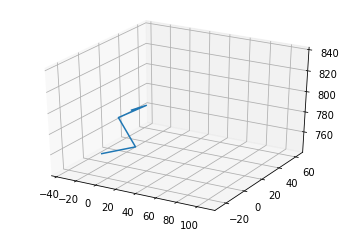

In [ ]:
%matplotlib inline
anim, all_points_flat = visualize_labels(config, label_file, 'hello.mp4', fps=300)
anim.save('2osc.mp4', writer="ffmpeg")
np.percentile(all_points_flat, [5, 95], axis=0)

In [ ]:
from IPython.display import HTML
HTML(anim.to_html5_video())

In [ ]:
cgroup = CameraGroup.load(calibration_file)

In [ ]:
## example triangulation without filtering, should take < 15 seconds
fname_dict = {
    '1': '/content/drive/MyDrive/Rat/3D tests/TWO_CAM_FOR_SAM/anipose_R11_treadmill/session1/pose-2d/cam1_R11_2021-08-02_1.h5',
    '2': '/content/drive/MyDrive/Rat/3D tests/TWO_CAM_FOR_SAM/anipose_R11_treadmill/session1/pose-2d/cam2_R11_2021-08-02_1.h5',
}

d = load_pose2d_fnames(fname_dict, cam_names=cgroup.get_names())

score_threshold = 0.5

n_cams, n_points, n_joints, _ = d['points'].shape
points = d['points']
scores = d['scores']

bodyparts = d['bodyparts']

# remove points that are below threshold
points[scores < score_threshold] = np.nan

points_flat = points.reshape(n_cams, -1, 2)
scores_flat = scores.reshape(n_cams, -1)

p3ds_flat = cgroup.triangulate(points_flat, progress=True)
reprojerr_flat = cgroup.reprojection_error(p3ds_flat, points_flat, mean=True)

p3ds = p3ds_flat.reshape(n_points, n_joints, 3)
reprojerr = reprojerr_flat.reshape(n_points, n_joints)

  0%|                                       | 0/89860 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
100%|████████████████████████| 89860/89860 [00:08<00:00, 10091.44it/s]


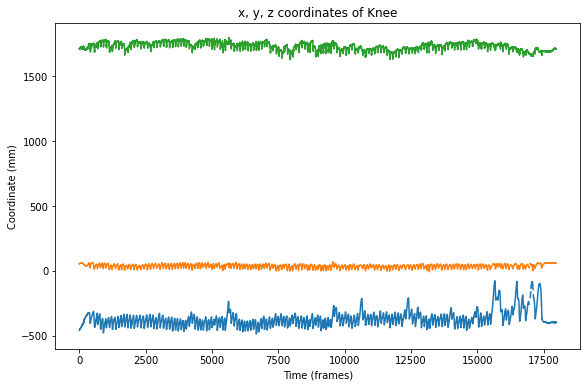

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

bodyPartIndex = 2
plt.figure(figsize=(9.4, 6))
plt.plot(p3ds[:, bodyPartIndex, 0])
plt.plot(p3ds[:, bodyPartIndex, 1])
plt.plot(p3ds[:, bodyPartIndex, 2])
plt.xlabel("Time (frames)")
plt.ylabel("Coordinate (mm)")
plt.title("x, y, z coordinates of {}".format(bodyparts[bodyPartIndex]))
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import get_cmap
%matplotlib notebook

def connect(ax, points, bps, bp_dict, color):
    ixs = [bp_dict[bp] for bp in bps]
    return ax.plot(points[ixs, 0], points[ixs, 1], points[ixs, 2], color=color)

def connect_all(ax, points, scheme, bodyparts, cmap=None):
    if cmap is None:
        cmap = get_cmap('tab10')
    bp_dict = dict(zip(bodyparts, range(len(bodyparts))))
    lines = []
    for i, bps in enumerate(scheme):
        line = connect(ax, points, bps, bp_dict, color=cmap(i)[:3])
        lines.append(line)
    return lines

## scheme for the hand
scheme = [
   ["Pelvis", "Hip", "Knee", "Ankle", "Toe"]
]

framenum = 5000
p3d = p3ds[framenum]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p3d[:,0], p3d[:,1], p3d[:,2], c='black', s=100)
connect_all(ax, p3d, scheme, bodyparts)

<IPython.core.display.Javascript object>

[[<mpl_toolkits.mplot3d.art3d.Line3D at 0x7f75155489d0>]]

<IPython.core.display.Javascript object>

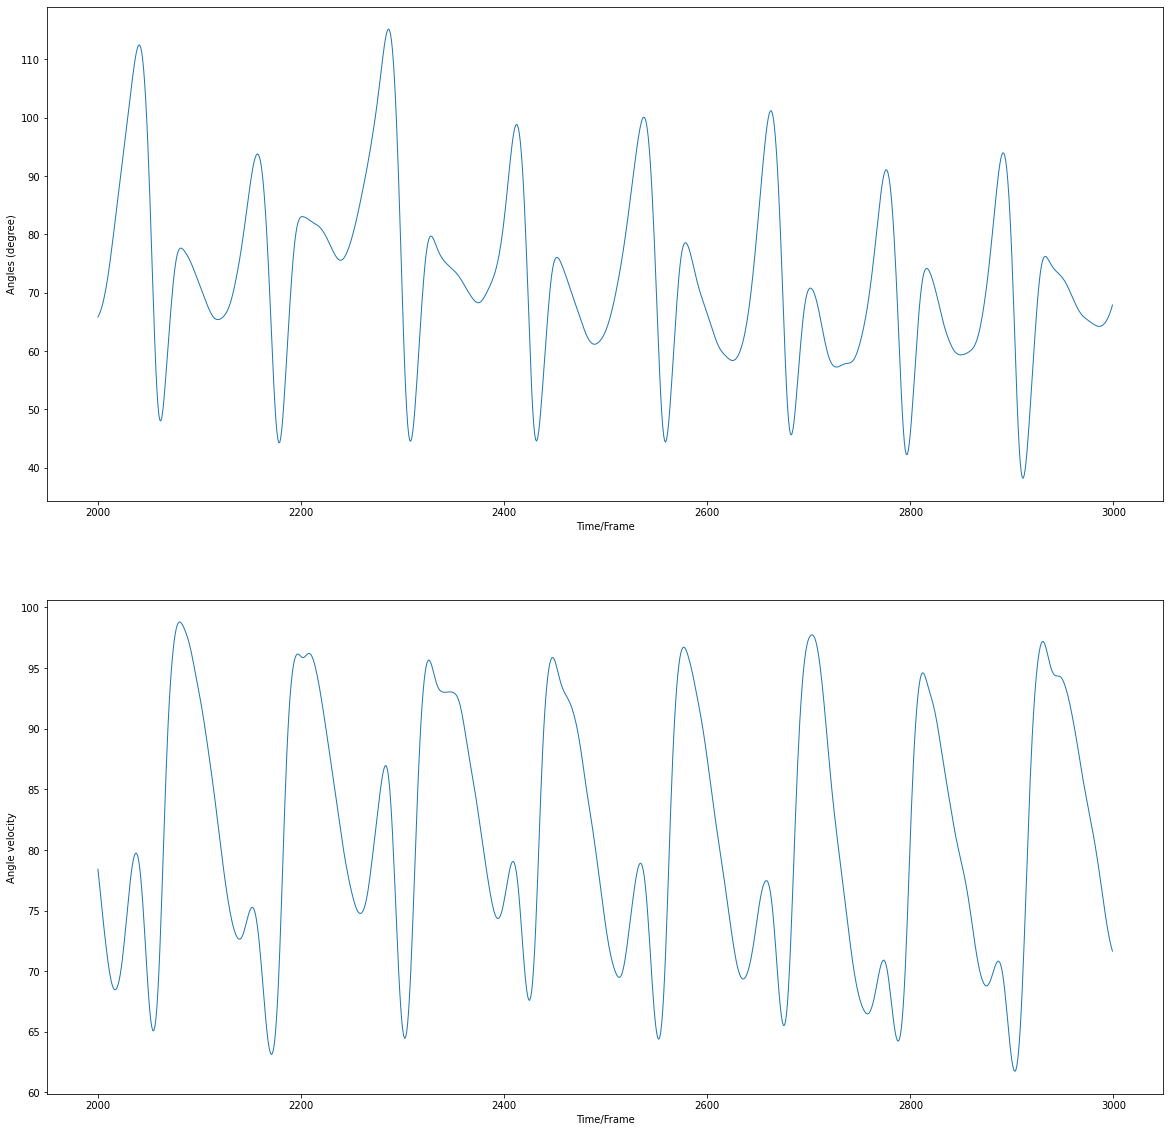

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csvPath = '/content/drive/MyDrive/Rat/3D tests/TWO_CAM_FOR_SAM/anipose_R11_treadmill copy/session1/angles/_R11_2021-08-02_1.csv'
df = pd.read_csv(csvPath)
bp_list = list(dict.fromkeys(df.columns))
coords = np.zeros((len(bp_list), len(df.index)))
coords.shape
for i in range(coords.shape[0]):
    for j in range(coords.shape[1]):
        coords[i,j] = df[bp_list[i]].iloc[j]

fig1 = plt.figure(figsize=(20, 20))
ax1 = fig1.add_subplot(211)
ax1.set_ylabel("Angles (degree)")
ax1.set_xlabel("Time/Frame")
y1 = coords[0, 2000:3000]
x1 = coords[2, 2000:3000]
ax1.plot(x1, y1, linewidth=1)

ax2 = fig1.add_subplot(212)
ax2.set_ylabel("Angle velocity")
ax2.set_xlabel("Time/Frame")
y2 = coords[1, 2000:3000]
x2 = coords[2, 2000:3000]
ax2.plot(x2, y2, linewidth=1)


In [ ]:
import glob
from pathlib import Path
import os

video_test = ['/content/drive/MyDrive/Rat/Treadmill test /rat i0/vids/cam1_rati0_2021-11-30_200f-11e100g1.avi',
              '/content/drive/MyDrive/Rat/Treadmill test /rat i0/vids/cam2_rati0_2021-11-30_200f-11e100g1.avi']
cam_names = ['cam1', 'cam2']

video_h5 = [
            glob.glob(os.path.join(video_test[i].replace('.avi', '') + "*" + ".h5"))
            for i in range(len(video_test))
            ]

video_h5 = [y for x in video_h5 for y in x]
video_dict = dict(zip(cam_names, video_h5))
video_dict

{'cam1': '/content/drive/MyDrive/Rat/Treadmill test /rat i0/vids/cam1_rati0_2021-11-30_200f-11e100g1DLC_resnet101_Treadmill Full LimbsDec15shuffle1_1030000.h5',
 'cam2': '/content/drive/MyDrive/Rat/Treadmill test /rat i0/vids/cam2_rati0_2021-11-30_200f-11e100g1DLC_resnet101_Treadmill Full LimbsDec15shuffle1_1030000.h5'}

Leftover codes


In [ ]:
# !pip install deeplabcut --quiet
# !pip install aniposelib --quiet
!pip install anipose==0.8.1 --quiet 
!pip install ffmpeg --quiet
!pip install --upgrade apptools --quiet
!pip uninstall opencv-python -y
!pip uninstall opencv-contrib-python -y
!pip install opencv-contrib-python

!pip uninstall mayavi -y
!pip install vtk==8.1.2
!pip install mayavi

!pip install git+https://github.com/samsam2610/AnalysisSupport